---
layout: post
title: "Loss function이란 무엇일까?"
author: "Chanjun Kim"
categories: Data분석
tags: [Data, Lossfunction, 손실함수, 목적함수, 비용함수, 머신러닝, 딥러닝, ML, DeepLearning]
image: 06_LSTM.png
---

## **학습목적**
이 포스팅에선 머신러닝/딥러닝에 쓰이는 Loss function에 대해서 알아보겠습니다.<br>

#### **1. Objective / Cost / Loss function**
- 만들고자 하는 머신러닝/딥러닝 모델을 만들 때 대체로 Loss function이란 말을 쓰지만 조금의 차이가 있을 수 있으니 위 세개의 말이 어떻게 다른지 알아보겠습니다.

**1. Objective Function(목적 함수)**
- 목적함수는 셋 중에 가장 큰 범위로 말 그대로 모델을 만드는 목적을 말합니다. 보통 Loss function은 오차를 최소화하기 위한 것이지만 MLE 같이 최대화하는 경우는 Loss function에는 포함되지 않습니다.

**2. Loss Function(손실 함수)**
- 손실 함수는 우리가 가지고 있는 예측된 값과 실제 Y값의 차이를 계산하는 함수입니다.

**3. Cost Function(목적 함수)**
- 목적함수는 전체 데이터의 손실의 합을 의미합니다.

### **모델 종류에 따른 Cost function의 종류**
- 분류 모델인지 회귀 모델인지에 따라서 각각 다른 Cost/Loss function을 사용하고 그 안에서도 다양하게 분류되어있습니다.
    - 이 중에서 대표적인 함수 몇개에 대해서 알아보도록 하겠습니다.

![Oops](https://miro.medium.com/max/972/1*3MsFzl7zRZE3TihIC9JmaQ.png)

- *사실 Loss function과 Cost function이 혼용되어 사용되고 있는 것 같습니다.*
    
> 출처 : [https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)

---

#### 1. MSE - Mean Squared Error(평균 제곱 오차)

![Oops](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FraTNF%2FbtqILMEZ4dR%2FGVFcXNBaX3KXuGWJ2MHsTk%2Fimg.png)

- 실제값과 예측값 오차(Error)의 제곱값의 평균입니다. 
    - 즉 오차의 제곱이 Loss function, 그 평균이 Cost function이 됩니다.(이 설명은 아래서부터는 생략하겠습니다.)
    - Gradient Descent를 할 때 미분값이 활용되므로 가장 일반적인 비용함수로 활용된다고 합니다.
    - 사용되지만 Error에 제곱을 하기 때문에 이상치에 민감하게 되는 특성을 가지고 있습니다.
    
---
    


#### 2. MAE - Mean Absolute Error(평균 절대 오차)

![Oops](https://blog.kakaocdn.net/dn/p0MT3/btqIPQ7GhmP/yk484qPJ3MK90RG9gnFOR1/img.png)

- 실제값과 예측값 오차(Error)의 절대값의 평균입니다.
    - 실제 값에 절대값만 취했기 때문에 오차에 민감하지 않습니다.
    - 미분을 하면 항상 일정하기 때문에 수렴이 안될 수도 있습니다.

##### ※ MAE와 MSE 의 손실 그래프
![Oops](https://miro.medium.com/max/700/1*JTC4ReFwSeAt3kvTLq1YoA.png)

- 첫번째 MAE의 손실함수는 오차가 작아지더라도 똑같은 기울기를 갖기 때문에 수렴하지 못할 가능성이 있습니다.

> 출처 : https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

In [38]:
import os
import sys
import warnings

import random

import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

from plotnine import * 

In [2]:
%matplotlib inline
warnings.filterwarnings(action='ignore')

---

- sklearn의 make_regression을 노이즈가 크고 작은 regression 데이터를 만든 후 GradientBoostRegression 에서 loss를 lad(Least Absolute Deviations), ls(Least Square) 를 각각의 Cost function으로 사용하여 비교를 해보겠습니다.

In [3]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=3, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})

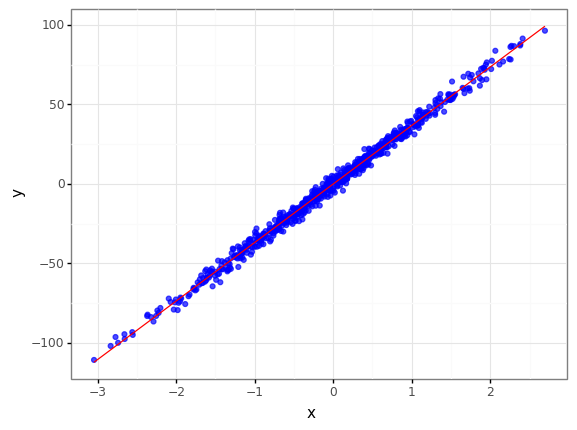

<ggplot: (144553471338)>

In [4]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = reg_data.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    theme_bw()
)

In [5]:
train_noise3, val_noise3 = train_test_split(reg_data)

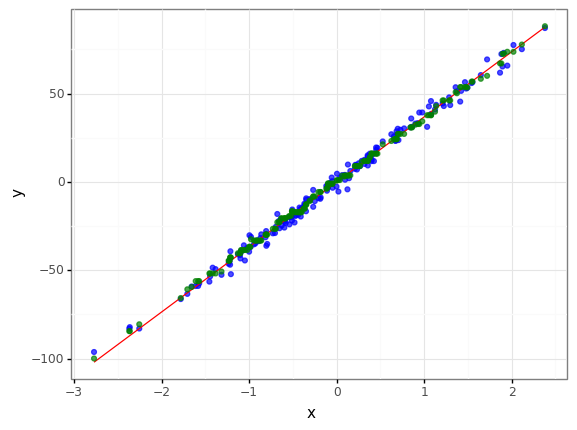

<ggplot: (144554744893)>

In [9]:
gb_mae = GradientBoostingRegressor(loss='lad')
gb_mae.fit(train_noise3[["x"]], train_noise3["y"])
val_noise3["predict_mae"] = gb_mae.predict(val_noise3[["x"]])

(
    ggplot() +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise3.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "predict_mae"), alpha = 0.7, color = "green") +
    theme_bw()
)

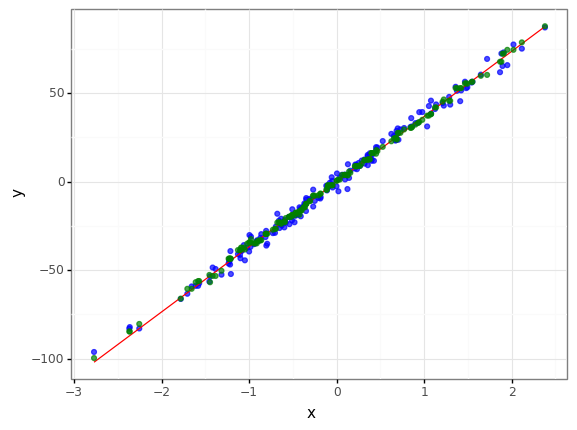

<ggplot: (144554795978)>

In [10]:
gb_mse = GradientBoostingRegressor(loss='ls')
gb_mse.fit(train_noise3[["x"]], train_noise3["y"])
val_noise3["predict_mse"] = gb_mse.predict(val_noise3[["x"]])

(
    ggplot() +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise3.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "predict_mse"), alpha = 0.7, color = "green") +
    theme_bw()
)

In [12]:
r2_mse = r2_score(val_noise3["y"], val_noise3["predict_mse"])
r2_mae = r2_score(val_noise3["y"], val_noise3["predict_mae"])
print(f"loss function = mse , r2 = {r2_mse} \nloss function = mae , r2 = {r2_mae} \n")
print("mse loss function is better") if r2_mse > r2_mae else print("mae loss function is better")

loss function = mse , r2 = 0.9924846441975949 
loss function = mae , r2 = 0.9922668674278056 

mse loss function is better


In [13]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=30, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})

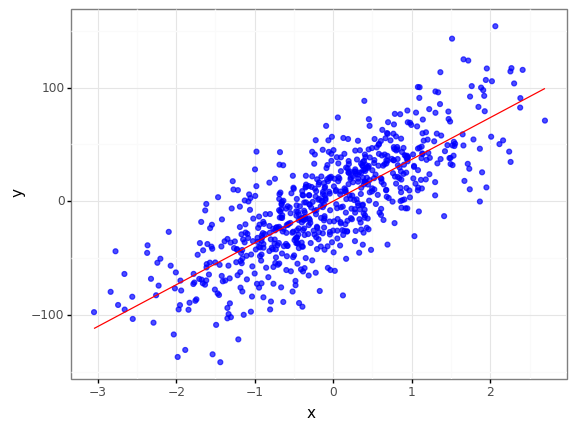

<ggplot: (144553559857)>

In [14]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = reg_data.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    theme_bw()
)

In [15]:
train_noise30, val_noise30 = train_test_split(reg_data)

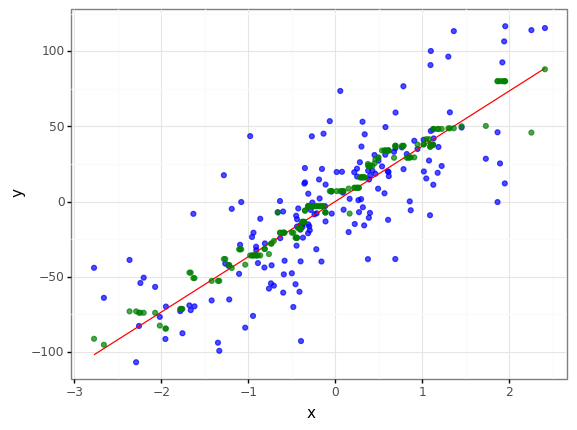

<ggplot: (144554968420)>

In [16]:
mod_mae = GradientBoostingRegressor(loss='lad')
mod_mae.fit(train_noise30[["x"]], train_noise30["y"])
val_noise30["predict_mae"] = mod_mae.predict(val_noise30[["x"]])

(
    ggplot() +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise30.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "predict_mae"), alpha = 0.7, color = "green") +
    theme_bw()
)

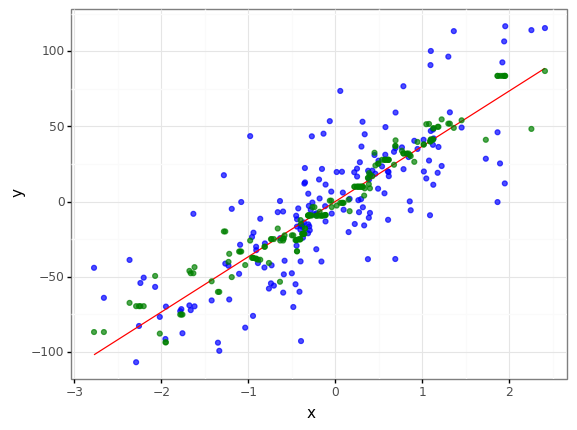

<ggplot: (144555012645)>

In [19]:
mod_mse = GradientBoostingRegressor(loss='ls')
mod_mse.fit(train_noise30[["x"]], train_noise30["y"])
val_noise30["predict_mse"] = mod_mse.predict(val_noise30[["x"]])

(
    ggplot() +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise30.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "predict_mse"), alpha = 0.7, color = "green") +
    theme_bw()
)

In [20]:
r2_mse = r2_score(val_noise30["y"], val_noise30["predict_mse"])
r2_mae = r2_score(val_noise30["y"], val_noise30["predict_mae"])
print(f"loss function = mse , r2 = {r2_mse} \nloss function = mae , r2 = {r2_mae} \n")
print("mse loss function is better") if r2_mse > r2_mae else print("mae loss function is better")

loss function = mse , r2 = 0.6182040229106938 
loss function = mae , r2 = 0.6228118545384501 

mae loss function is better


In [35]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=3, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})

In [42]:
reg_data.y.describe()

count    700.000000
mean      -2.452193
std       37.111026
min     -110.632613
25%      -26.714069
50%       -2.736849
75%       22.932101
max       96.369512
Name: y, dtype: float64

In [40]:
random.randint()

<bound method Random.randint of <random.Random object at 0x0000021A336DB600>>

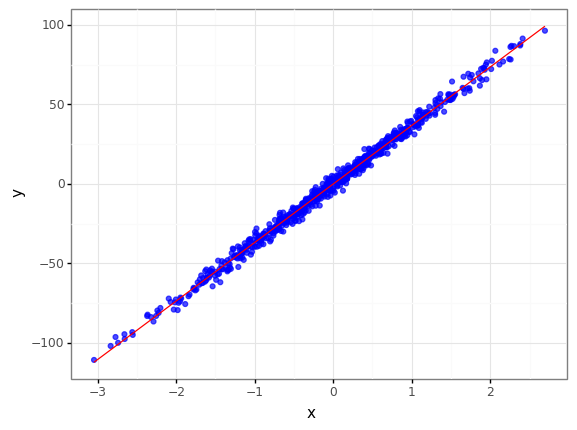

<ggplot: (144555188173)>

In [36]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = reg_data.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    theme_bw()
)

In [5]:
train_noise3, val_noise3 = train_test_split(reg_data)

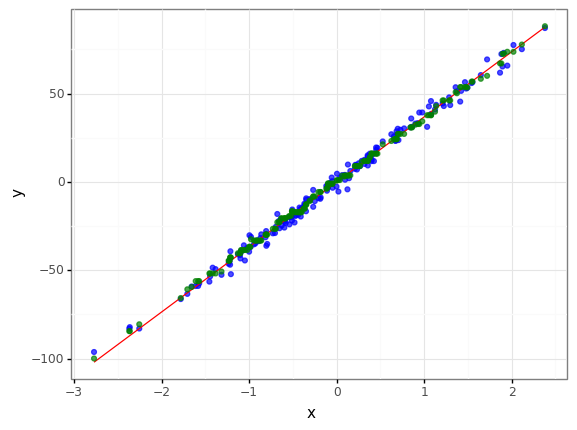

<ggplot: (144554744893)>

In [9]:
gb_mae = GradientBoostingRegressor(loss='lad')
gb_mae.fit(train_noise3[["x"]], train_noise3["y"])
val_noise3["predict_mae"] = gb_mae.predict(val_noise3[["x"]])

(
    ggplot() +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise3.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "predict_mae"), alpha = 0.7, color = "green") +
    theme_bw()
)

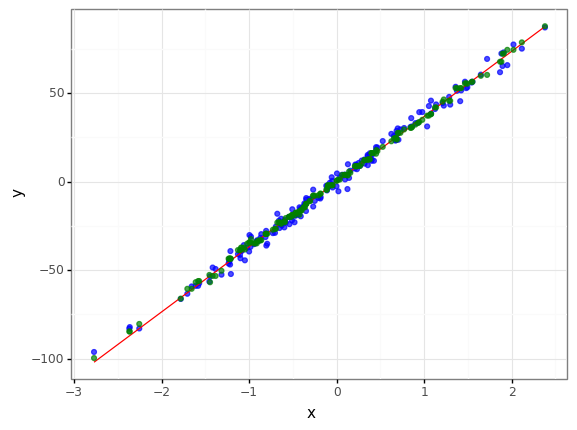

<ggplot: (144554795978)>

In [10]:
gb_mse = GradientBoostingRegressor(loss='ls')
gb_mse.fit(train_noise3[["x"]], train_noise3["y"])
val_noise3["predict_mse"] = gb_mse.predict(val_noise3[["x"]])

(
    ggplot() +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise3.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "predict_mse"), alpha = 0.7, color = "green") +
    theme_bw()
)

In [12]:
r2_mse = r2_score(val_noise3["y"], val_noise3["predict_mse"])
r2_mae = r2_score(val_noise3["y"], val_noise3["predict_mae"])
print(f"loss function = mse , r2 = {r2_mse} \nloss function = mae , r2 = {r2_mae} \n")
print("mse loss function is better") if r2_mse > r2_mae else print("mae loss function is better")

loss function = mse , r2 = 0.9924846441975949 
loss function = mae , r2 = 0.9922668674278056 

mse loss function is better


##### 1.1 RMSE - Root Mean Squared Error(평균 절대 오차)

![Oops](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F8rc53%2FbtqIOoQ7txw%2FNYjEa95VQGXdJKAkK15tn0%2Fimg.png)

- 실제값과 예측값 오차(Error)의 제곱값의 평균의 제곱근 값입니다. 
    - MSE가 실제 값에 제곱이 되어있기 때문에 평가지표로서 비교하기 어려움으로 제곱근을 하면 비교가 용이해집니다.(표준편차와 분산 이라고 생각하시면 될 것 같습니다.)
    - Gradient Descent를 할 때 미분값이 활용되므로 가장 일반적인 비용함수로 활용된다고 합니다.
    - 사용되지만 Error에 제곱을 하기 때문에 이상치에 민감하게 되는 특성을 가지고 있습니다.

---


> 출처 : [https://brunch.co.kr/@tristanmhhd/14](https://brunch.co.kr/@tristanmhhd/14)<br>
> 출처 : [https://steadiness-193.tistory.com/277]](https://steadiness-193.tistory.com/277)

---

code : https://github.com/Chanjun-kim/Chanjun-kim.github.io/blob/main/_ipynb/2021-07-05-LossFunction.ipynb

---

참고 자료 : 
- https://ganghee-lee.tistory.com/28

In [1]:
import tensorflow as tf